In [2]:
#Import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import pandas as pd

In [3]:
#Identify path
path = '/Users/emmabenedict/Desktop/Code/'

In [4]:
#Load .nc file for E3SM.HR and E3SM.MMF
#HR
esm_hr = xr.open_dataset(path + 'E3SM.HR.ne120pg2.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#MMF
esm_mmf = xr.open_dataset(path + 'E3SM.MMF.ne30pg2_CRM64x2000.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#CPC
cpc_nc = xr.open_dataset(path + 'CPC.1958-1997.US.2x2.5.hourly.precip.nc')
#IMERG
imerg_nc = xr.open_dataset(path + 'IMERG.2001-2020.US.2x2.5.half_hourly.precipitationCal.nc')

In [5]:
#Load variables
#HR
lat_hr = esm_hr.lat
lon_hr = esm_hr.lon
time_hr = esm_hr.time
precc_hr = esm_hr.PRECC
precl_hr = esm_hr.PRECL
precip_hr = precc_hr + precl_hr
area_hr = esm_hr.area
#MMF
lat_mmf = esm_mmf.lat
lon_mmf = esm_mmf.lon
time_mmf = esm_mmf.time
precc_mmf = esm_mmf.PRECC
precl_mmf = esm_mmf.PRECL
precip_mmf = precc_mmf + precl_mmf
area_mmf = esm_mmf.area

In [6]:
#Load variables
#CPC
lat_cpc = cpc_nc.lat
lon_cpc = cpc_nc.lon
time_cpc = cpc_nc.time
precip_cpc = cpc_nc.precip
#MMF
lat_img = imerg_nc.lat
lon_img = imerg_nc.lon
time_img = imerg_nc.time
precip_img = imerg_nc.precipitationCal

In [7]:
#Specific locations: Athens and Seattle
hr_athens = precip_hr.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60
hr_seattle = precip_hr.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60
mmf_athens = precip_mmf.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60
mmf_seattle = precip_mmf.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60
#Obs
cpc_athens = precip_cpc.sel(lon=276.64,lat=33.95,method="nearest")*25.4
cpc_seattle = precip_cpc.sel(lon=237.67,lat=47.60,method="nearest")*25.4
img_athens = precip_img.sel(lon=276.64,lat=33.95,method="nearest")
img_seattle = precip_img.sel(lon=237.67,lat=47.60,method="nearest")

In [8]:
#Pick out one year
hr_athens_summer = hr_athens.sel(time = slice("0005-05-01 00:00:00","0005-09-30 23:00:00"))#.mean(dim="time")
hr_seattle_summer = hr_seattle.sel(time = slice("0005-05-01 00:00:00","0005-09-30 23:00:00"))#.mean(dim="time")
mmf_athens_summer = mmf_athens.sel(time = slice("0005-05-01 00:00:00","0005-09-30 23:00:00"))#.mean(dim="time")
mmf_seattle_summer = mmf_seattle.sel(time = slice("0005-05-01 00:00:00","0005-09-30 23:00:00"))#.mean(dim="time")
cpc_athens_summer = cpc_athens.sel(time = slice("1977-05-01T00:00:00.000000000", "1977-09-30T23:00:00.000000000"))#.mean(dim="time")
cpc_seattle_summer = cpc_seattle.sel(time = slice("1977-05-01T00:00:00.000000000", "1977-09-30T23:00:00.000000000"))#.mean(dim="time")
img_athens_summer = img_athens.sel(time = slice("2010-05-01 00:00:00","2010-09-30 23:30:00")).resample(time='1H').mean()#.mean(dim="time")
img_seattle_summer = img_seattle.sel(time = slice("2010-05-01 00:00:00","2010-09-30 23:30:00")).resample(time='1H').mean()#.mean(dim="time")

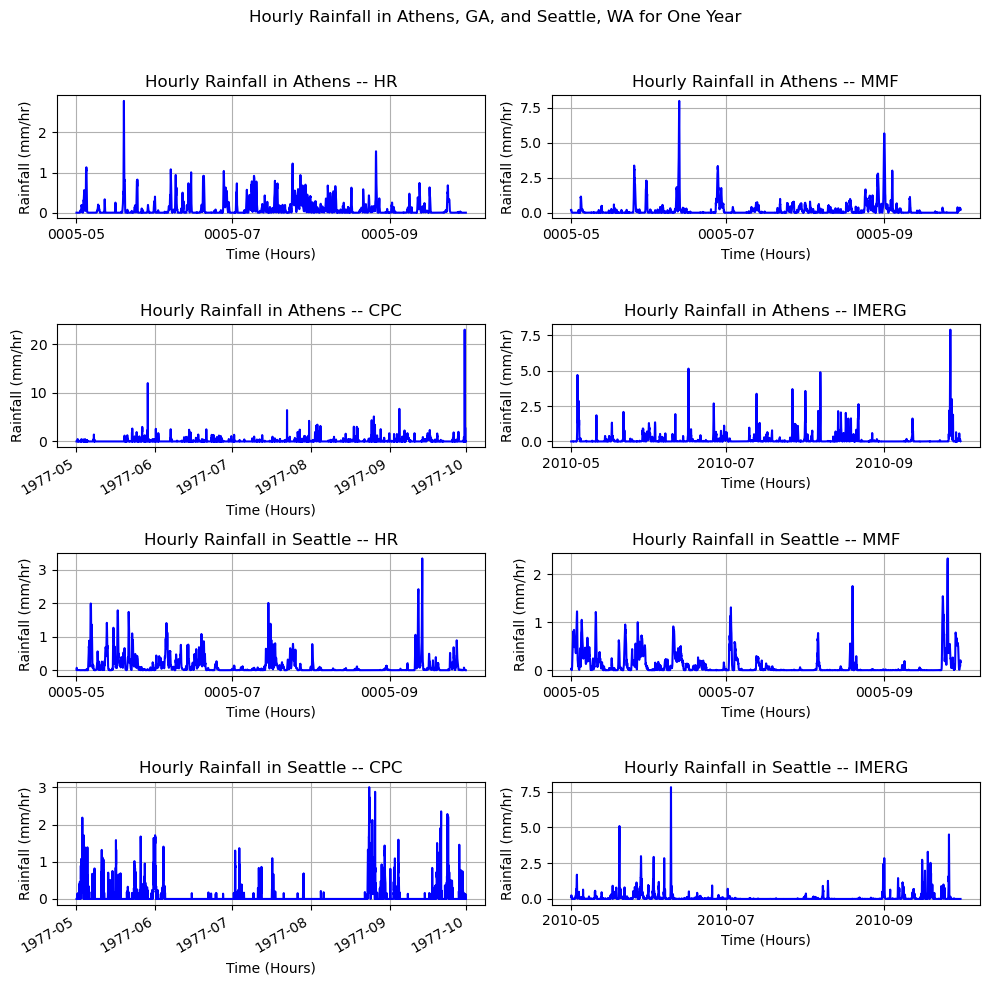

In [9]:
plt.figure(figsize = (10,10))
plt.subplot(4,2,1)
hr_athens_summer.plot(color = "blue")
# plt.axhline(y=hr_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_hr_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- HR")

plt.subplot(4,2,2)
mmf_athens_summer.plot(color = "blue")
# plt.axhline(y=mmf_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_mmf_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- MMF")

plt.subplot(4,2,3)
cpc_athens_summer.plot(color = "blue")
# plt.axhline(y=cpc_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_cpc_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- CPC")

plt.subplot(4,2,4)
img_athens_summer.plot(color = "blue")
# plt.axhline(y=img_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_img_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- IMERG")

plt.subplot(4,2,5)
hr_seattle_summer.plot(color = "blue")
# plt.axhline(y=hr_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_hr_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- HR")

plt.subplot(4,2,6)
mmf_seattle_summer.plot(color = "blue")
# plt.axhline(y=mmf_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_mmf_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- MMF")

plt.subplot(4,2,7)
cpc_seattle_summer.plot(color = "blue")
# plt.axhline(y=cpc_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_cpc_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- CPC")

plt.subplot(4,2,8)
img_seattle_summer.plot(color = "blue")
plt.grid()
# plt.axhline(y=img_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_img_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- IMERG")

plt.suptitle('Hourly Rainfall in Athens, GA, and Seattle, WA for One Year', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [10]:
#Create function for rolling mean
def rolling_mean(data, window):
    return np.convolve(data, np.ones(window), 'valid') / window

In [11]:
hr_athens_rm = rolling_mean(hr_athens_summer,24)
hr_seattle_rm = rolling_mean(hr_seattle_summer,24)
mmf_athens_rm = rolling_mean(mmf_athens_summer,24)
mmf_seattle_rm = rolling_mean(mmf_seattle_summer,24)
cpc_athens_rm = rolling_mean(cpc_athens_summer,24)
cpc_seattle_rm = rolling_mean(cpc_seattle_summer,24)
img_athens_rm = rolling_mean(img_athens_summer,24)
img_seattle_rm = rolling_mean(img_seattle_summer,24)

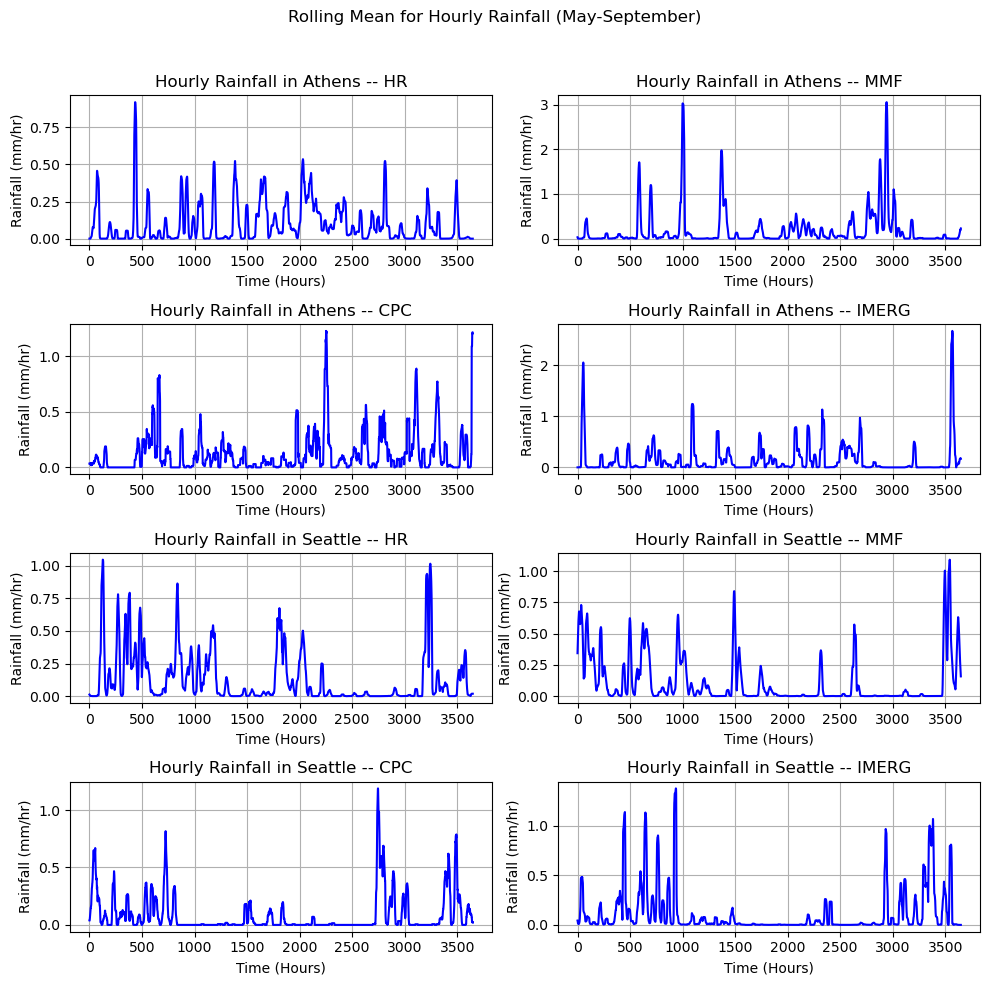

In [12]:
plt.figure(figsize = (10,10))
plt.subplot(4,2,1)
plt.plot(hr_athens_rm, color = 'blue')
# plt.axhline(y=hr_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_hr_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- HR")

plt.subplot(4,2,2)
plt.plot(mmf_athens_rm, color = 'blue')
# plt.axhline(y=mmf_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_mmf_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- MMF")

plt.subplot(4,2,3)
plt.plot(cpc_athens_rm, color = 'blue')
# plt.axhline(y=cpc_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_cpc_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- CPC")

plt.subplot(4,2,4)
plt.plot(img_athens_rm, color = 'blue')
# plt.axhline(y=img_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_img_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- IMERG")

plt.subplot(4,2,5)
plt.plot(hr_seattle_rm, color = 'blue')
# plt.axhline(y=hr_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_hr_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- HR")

plt.subplot(4,2,6)
plt.plot(mmf_seattle_rm, color = 'blue')
# plt.axhline(y=mmf_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_mmf_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- MMF")

plt.subplot(4,2,7)
plt.plot(cpc_seattle_rm, color = 'blue')
# plt.axhline(y=cpc_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_cpc_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- CPC")

plt.subplot(4,2,8)
plt.plot(img_seattle_rm, color = 'blue')
# plt.axhline(y=img_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_img_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- IMERG")

plt.suptitle('Rolling Mean for Hourly Rainfall (May-September)', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

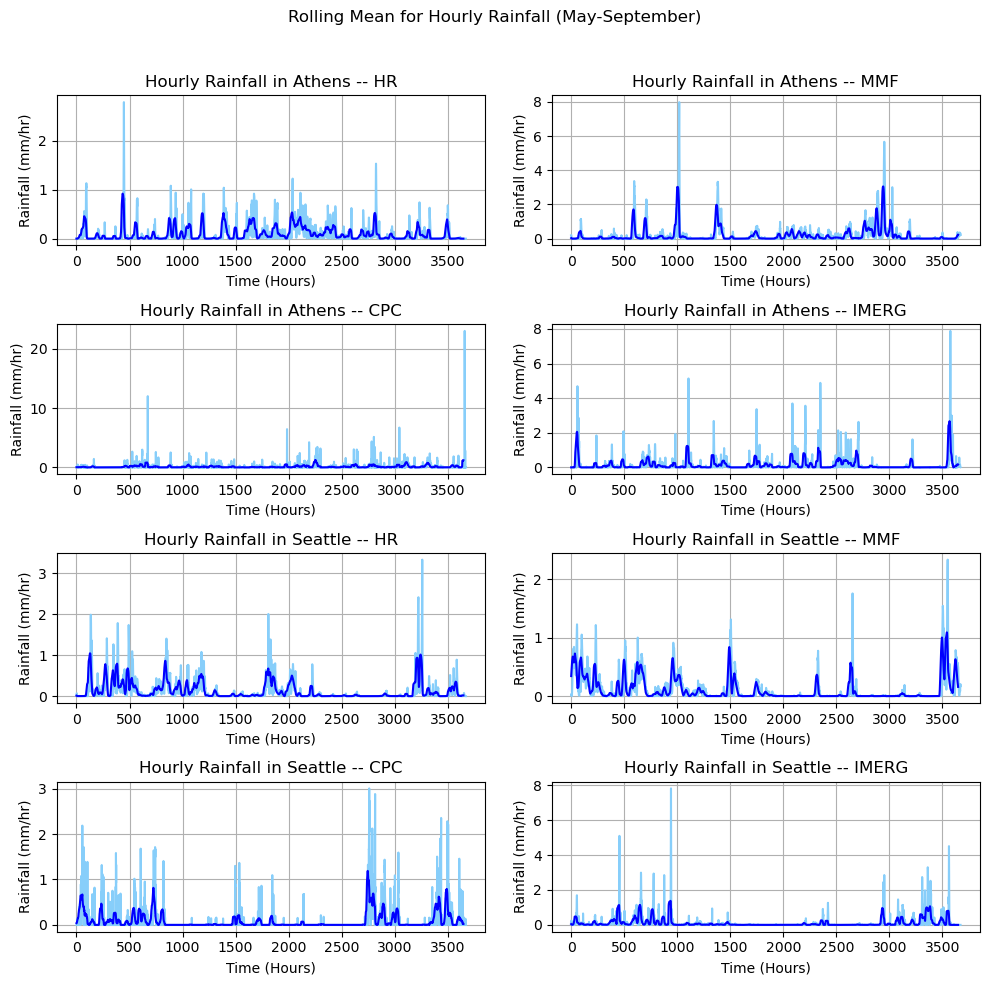

In [13]:
plt.figure(figsize = (10,10))
plt.subplot(4,2,1)
plt.plot(hr_athens_summer, color = "lightskyblue")
plt.plot(hr_athens_rm, color = 'blue')
# plt.axhline(y=hr_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_hr_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- HR")

plt.subplot(4,2,2)
plt.plot(mmf_athens_summer, color = "lightskyblue")
plt.plot(mmf_athens_rm, color = 'blue')
# plt.axhline(y=mmf_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_mmf_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- MMF")

plt.subplot(4,2,3)
plt.plot(cpc_athens_summer, color = "lightskyblue")
plt.plot(cpc_athens_rm, color = 'blue')
# plt.axhline(y=cpc_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_cpc_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- CPC")

plt.subplot(4,2,4)
plt.plot(img_athens_summer, color = "lightskyblue")
plt.plot(img_athens_rm, color = 'blue')
# plt.axhline(y=img_athens_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_img_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Athens -- IMERG")

plt.subplot(4,2,5)
plt.plot(hr_seattle_summer, color = "lightskyblue")
plt.plot(hr_seattle_rm, color = 'blue')
# plt.axhline(y=hr_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_hr_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- HR")

plt.subplot(4,2,6)
plt.plot(mmf_seattle_summer, color = "lightskyblue")
plt.plot(mmf_seattle_rm, color = 'blue')
# plt.axhline(y=mmf_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_mmf_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- MMF")

plt.subplot(4,2,7)
plt.plot(cpc_seattle_summer, color = "lightskyblue")
plt.plot(cpc_seattle_rm, color = 'blue')
# plt.axhline(y=cpc_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_cpc_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- CPC")

plt.subplot(4,2,8)
plt.plot(img_seattle_summer, color = "lightskyblue")
plt.plot(img_seattle_rm, color = 'blue')
# plt.axhline(y=img_seattle_99, color='red', linestyle='--', label='99th Percentile')
# plt.axhline(y=avg_img_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Hours)")
plt.ylabel("Rainfall (mm/hr)")
plt.grid()
#plt.legend()
plt.title("Hourly Rainfall in Seattle -- IMERG")

plt.suptitle('Rolling Mean for Hourly Rainfall (May-September)', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [14]:
hr_athens_array = np.array(hr_athens_summer)
mmf_athens_array = np.array(mmf_athens_summer)
hr_seattle_array = np.array(hr_seattle_summer)
mmf_seattle_array = np.array(mmf_seattle_summer)

count = 0
count1 = 0
count2 = 0
count3 = 0
 
for i in hr_athens_array:
    if i >= 1:
        #print(i)
        count = count + 1
    # elif i <0.5: 
    #     print(i)
print(f'Number of times in Athens (HR) it exceeds 1 mm/hr: {count}')

for i in mmf_athens_array:
    if i >= 1:
        #print(i)
        count1 = count1 + 1
    # elif i <0.5: 
    #     print(i)
print(f'Number of times in Athens (MMF) it exceeds 1 mm/hr: {count1}')

for i in hr_seattle_array:
    if i >= 1:
        #print(i)
        count2 = count2 + 1
    # elif i <0.5: 
    #     print(i)
print(f'Number of times in Seattle (HR) it exceeds 1 mm/hr: {count2}')

for i in mmf_seattle_array:
    if i >= 1:
        #print(i)
        count3 = count3 + 1
    # elif i <0.5: 
    #     print(i)
print(f'Number of times in Seattle (MMF) it exceeds 1 mm/hr: {count3}')

Number of times in Athens (HR) it exceeds 1 mm/hr: 24
Number of times in Athens (MMF) it exceeds 1 mm/hr: 157
Number of times in Seattle (HR) it exceeds 1 mm/hr: 72
Number of times in Seattle (MMF) it exceeds 1 mm/hr: 53


In [15]:
# Initialize count and list for timestamps
count = 0
exceeding_timestamps_athens_hr = []
exceeding_values_athens_hr = []
time_array = np.array(time_hr)

# Loop through the rainfall data and timestamps together
for i, timestamp in zip(hr_athens_array, time_array):
    if i >= 1:
        count += 1
        exceeding_timestamps_athens_hr.append(timestamp)
        exceeding_values_athens_hr.append(i)
    #plt.scatter(exceeding_timestamps, exceeding_values)

# Output the result
print(f'Number of times in Athens (HR) it exceeds 1 mm/hr: {count}')
#print("Timestamps of those occurrences:", exceeding_timestamps)

Number of times in Athens (HR) it exceeds 1 mm/hr: 24


Text(0.5, 1.0, 'Timestamps exceeding 1 mm of rainfall per hour')

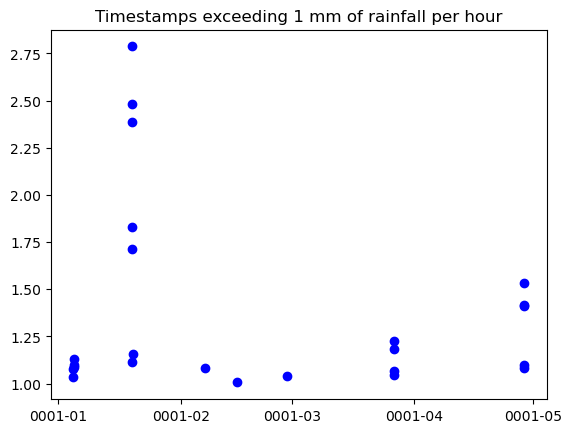

In [16]:
plt.scatter(exceeding_timestamps_athens_hr, exceeding_values_athens_hr, color = 'blue')
plt.title("Timestamps exceeding 1 mm of rainfall per hour")

In [17]:
# Initialize count and list for timestamps
count = 0
exceeding_timestamps_athens_mmf = []
exceeding_values_athens_mmf = []
time_array_mmf = np.array(time_mmf)

# Loop through the rainfall data and timestamps together
for i, timestamp in zip(mmf_athens_array, time_array_mmf):
    if i >= 1:
        count += 1
        exceeding_timestamps_athens_mmf.append(timestamp)
        exceeding_values_athens_mmf.append(i)
    #plt.scatter(exceeding_timestamps, exceeding_values)

# Output the result
print(f'Number of times in Athens (MMF) it exceeds 1 mm/hr: {count}')
#print("Timestamps of those occurrences:", exceeding_timestamps)

Number of times in Athens (MMF) it exceeds 1 mm/hr: 157


In [18]:
# Initialize count and list for timestamps
count = 0
exceeding_timestamps_seattle_hr = []
exceeding_values_seattle_hr = []
time_array = np.array(time_hr)

# Loop through the rainfall data and timestamps together
for i, timestamp in zip(hr_seattle_array, time_array):
    if i >= 1:
        count += 1
        exceeding_timestamps_seattle_hr.append(timestamp)
        exceeding_values_seattle_hr.append(i)
    #plt.scatter(exceeding_timestamps, exceeding_values)

# Output the result
print(f'Number of times in Seattle (HR) it exceeds 1 mm/hr: {count}')
#print("Timestamps of those occurrences:", exceeding_timestamps)

Number of times in Seattle (HR) it exceeds 1 mm/hr: 72


In [20]:
# Initialize count and list for timestamps
count = 0
exceeding_timestamps_seattle_mmf = []
exceeding_values_seattle_mmf = []
time_array_mmf = np.array(time_mmf)

# Loop through the rainfall data and timestamps together
for i, timestamp in zip(mmf_seattle_array, time_array_mmf):
    if i >= 1:
        count += 1
        exceeding_timestamps_seattle_mmf.append(timestamp)
        exceeding_values_seattle_mmf.append(i)
    #plt.scatter(exceeding_timestamps, exceeding_values)

# Output the result
print(f'Number of times in Seattle (HR) it exceeds 1 mm/hr: {count}')
#print("Timestamps of those occurrences:", exceeding_timestamps)

Number of times in Seattle (HR) it exceeds 1 mm/hr: 53


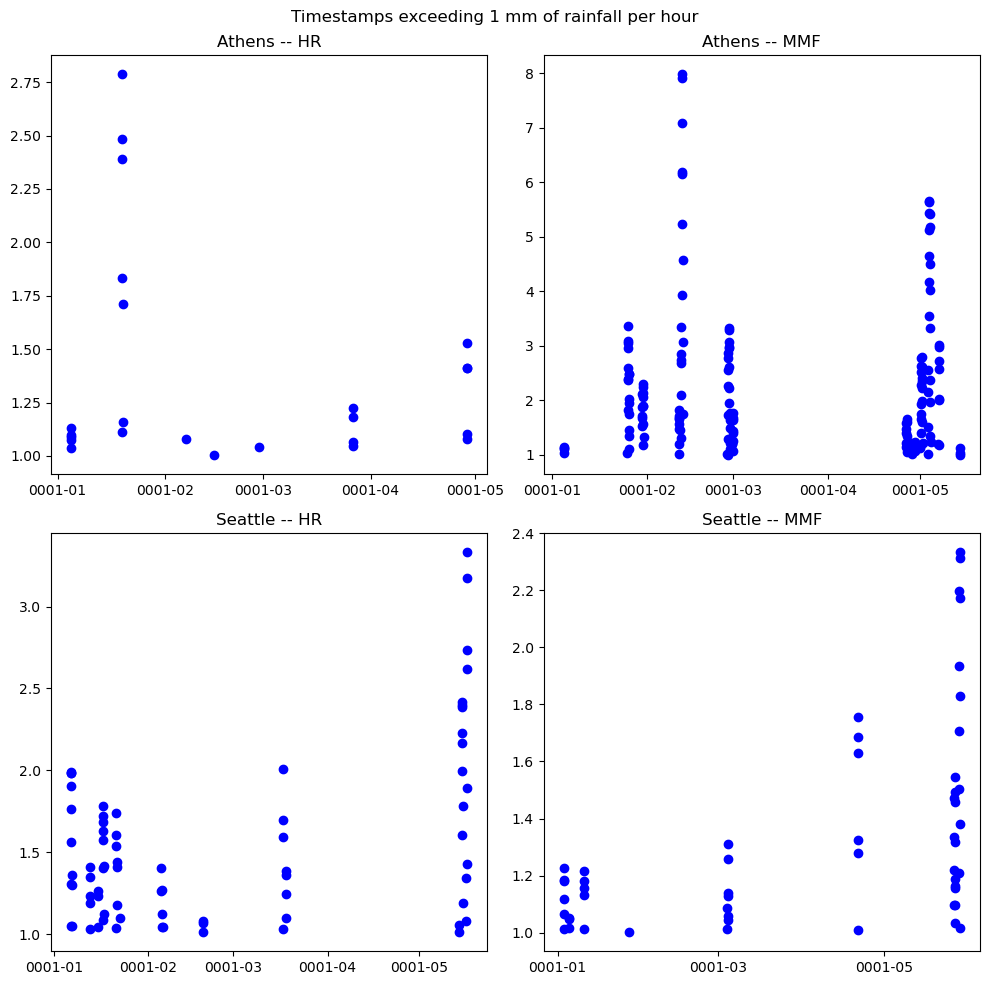

In [21]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(exceeding_timestamps_athens_hr, exceeding_values_athens_hr, color = 'blue')
plt.title("Athens -- HR")

plt.subplot(2,2,2)
plt.scatter(exceeding_timestamps_athens_mmf, exceeding_values_athens_mmf, color = 'blue')
plt.title("Athens -- MMF")

plt.subplot(2,2,3)
plt.scatter(exceeding_timestamps_seattle_hr, exceeding_values_seattle_hr, color = 'blue')
plt.title("Seattle -- HR")

plt.subplot(2,2,4)
plt.scatter(exceeding_timestamps_seattle_mmf, exceeding_values_seattle_mmf, color = 'blue')
plt.title("Seattle -- MMF")

plt.suptitle("Timestamps exceeding 1 mm of rainfall per hour")
plt.tight_layout()